## Lab 4

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/UTA-DataScience/DATA1401.2020.Fall/blob/master/Labs/Lab.4/Lab.4.ipynb)

In this lab we will become familiar with distributions, histograms, and functional programming. 


### Uniform Distribution
Lets start with generating some fake random data. You can get a random number between 0 and 1 using the python random module as follow:

In [1]:
import random
x=random.random()
print("The Value of x is", x)

The Value of x is 0.3334715012458438


Everytime you call random, you will get a new number.

*Exercise 1:* Using random, write a function `generate_uniform(N, mymin, mymax)`, that returns a python list containing N random numbers between specified minimum and maximum value. Note that you may want to quickly work out on paper how to turn numbers between 0 and 1 to between other values. 

In [99]:
# Skeleton

def generate_uniform(N,x_min,x_max):
    out = []
    ### BEGIN SOLUTION

    import random
    for i in range(0,1000):
      x = random.uniform(-10,10)
      out.append(x)   
    
    ### END SOLUTION
    return out

In [100]:
# Test your solution here
data=generate_uniform(1000,-10,10)
print ("Data Type:", type(data))
print ("Data Length:", len(data))
if len(data)>0: 
    print ("Type of Data Contents:", type(data[0]))
    print ("Data Minimum:", min(data))
    print ("Data Maximum:", max(data))

Data Type: <class 'list'>
Data Length: 1000
Type of Data Contents: <class 'float'>
Data Minimum: -9.999264597574884
Data Maximum: 9.978259626083279


*Exercise 2a:* 
Write a function that computes the mean of values in a list.

In [81]:
# Skeleton
def mean(Data):
    m=([4.2, 9, 3, 1, 41, 5.2, 4, 99, 3, 9])
    
    ### BEGIN SOLUTION

    return sum(m) / len(m)     
    
    ### END SOLUTION
    
    return m

In [82]:
# Test your solution here
print ("Mean of Data:", mean(data))

Mean of Data: 17.84


*Exercise 2b:* 
Write a function that computes the variance of values in a list.

In [54]:
# Skeleton
def variance(Data):
    m=([4.2, 9, 3, 1, 41, 5.2, 4, 99, 3, 9])

    
    ### BEGIN SOLUTION


     
    return sum((i - (sum(m) / len(m))) ** 2 for i in m) / len(m) 
  

    ### END SOLUTION
    
    return m

In [55]:
# Test your solution here
print ("Variance of Data:", variance(data))

Variance of Data: 854.1024


## Histogramming

*Exercise 3:* Write a function that bins the data so that you can create a histogram. An example of how to implement histogramming is the following logic:

* User inputs a list of values `x` and optionally `n_bins` which defaults to 10.
* If not supplied, find the minimum and maximum (`x_min`,`x_max`) of the values in x.
* Determine the bin size (`bin_size`) by dividing the range of the function by the number of bins.
* Create an empty list of zeros of size `n_bins`, call it `hist`.
* Loop over the values in `x`
    * Loop over the values in `hist` with index `i`:
        * If x is between `x_min+i*bin_size` and `x_min+(i+1)*bin_size`, increment `hist[i].` 
        * For efficiency, try to use continue to goto the next bin and data point.
* Return `hist` and the list corresponding of the bin edges (i.e. of `x_min+i*bin_size`).    

enter values seperated by space: 2 7 7 7 7 12 13.5


([5, 0, 0, 0, 0, 0, 0, 0, 0, 0], array([ 2., 12.]))

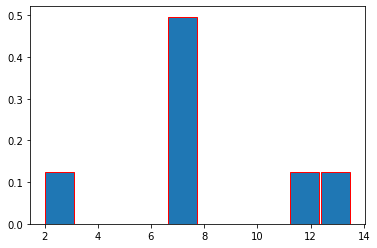

In [91]:
def histogram(x,n_bins=10,x_min=None,x_max=None):

        import matplotlib.pyplot as plt
        import numpy as np
        %matplotlib inline

        inp=input("enter values seperated by space: ")

        data = [float(x) for x in inp.split(" ")]

        x_min = (min(data))
        x_max = (max(data))   
        n_bins = 10


        plt.hist(data, 10, (x_min,x_max), rwidth=0.95, edgecolor='red', density=True)

        if x_min==None:
            x_min=min(data)
        if x_max==None:
            x_max=max(data)

        bin_edges = np.arange(x_min,x_max,n_bins)

        hist=[0]*n_bins

        for d in data:
            for i,(low_edge,high_edge) in enumerate(zip(bin_edges[:-1],bin_edges[1:])):
                if d>=low_edge and d<high_edge:
                    hist[i]+=1
                    break

        return hist,bin_edges

histogram(data,n_bins=10,x_min=None,x_max=None)

*Exercise 4:* Write a function that uses the histogram function in the previous exercise to create a text-based "graph". For example the output could look like the following:
```
[  0,  1] : ######
[  1,  2] : #####
[  2,  3] : ######
[  3,  4] : ####
[  4,  5] : ####
[  5,  6] : ######
[  6,  7] : #####
[  7,  8] : ######
[  8,  9] : ####
[  9, 10] : #####
```

Where each line corresponds to a bin and the number of `#`'s are proportional to the value of the data in the bin. 

In [126]:
# Solution
#def draw_histogram(x,n_bins,x_min=None,x_max=None,character="#",max_character_per_line=20):
    ### BEGIN SOLUTION

import numpy as np

def hist(a, bins=10, width=3):
    h, b = np.histogram(a, bins)
    
    
    for i in range (0, bins):
        print('{:10f}  | {:{width}s} {}'.format(
            b[i], 
            '#'*int(width*h[i]/np.amax(h)), 
            h[i], 
            width=width))
    print('{:10f}  |'.format(b[bins]))
    
hist(np.random.normal(size=10))    
    ### END SOLUTION

    #return hist,bin_edges

TypeError: ignored

In [ ]:
# Test your solution here
h,b=histogram(data,20)

## Functional Programming

*Exercise 5:* Write a function the applies a booling function (that returns true/false) to every element in data, and return a list of indices of elements where the result was true. Use this function to find the indices of entries greater than 0.5. 

In [139]:
#def where(mylist,myfunc):
    #out= []
    
    ### BEGIN SOLUTION

mylist = [.2, 68, 3, 9, .1]

num = .5

def check(mylist, num):

  for value in mylist:
      ## if value less than num returns False
      if value <= num:
        return False
## if the following statement executes i.e., list contains values which are greater than given num
  return True
print(check(mylist, num))    
### END SOLUTION

return out

#where(mylist,myfunc)

False


SyntaxError: ignored

In [12]:
# Test your solution here

*Exercise 6:* The inrange(mymin,mymax) function below returns a function that tests if it's input is between the specified values. Write corresponding functions that test:
* Even
* Odd
* Greater than
* Less than
* Equal
* Divisible by

In [140]:
def in_range(mymin,mymax):
    def testrange(x):
        return x<mymax and x>=mymin
    return testrange

# Examples:
F1=in_range(0,10)
F2=in_range(10,20)

# Test of in_range
print (F1(0), F1(1), F1(10), F1(15), F1(20))
print (F2(0), F2(1), F2(10), F2(15), F2(20))

print ("Number of Entries passing F1:", len(where(data,F1)))
print ("Number of Entries passing F2:", len(where(data,F2)))

True True False False False
False False True True False


TypeError: ignored

In [106]:
num = int(input("Enter a number: "))


if (num % 2) == 0:
   print("{0} is Even".format(num))
else:
   print("{0} is Odd".format(num))

Enter a number: 8
8 is Even


In [ ]:
# Test your solution

*Exercise 7:* Repeat the previous exercise using `lambda` and the built-in python functions sum and map instead of your solution above. 

In [ ]:
### BEGIN SOLUTION

    # Fill in your solution here        
    
### END SOLUTION

## Monte Carlo

*Exercise 7:* Write a "generator" function called `generate_function(func,x_min,x_max,N)`, that instead of generating a flat distribution, generates a distribution with functional form coded in `func`. Note that `func` will always be > 0.  

Use the test function below and your histogramming functions above to demonstrate that your generator is working properly.

Hint: A simple, but slow, solution is to a draw random number test_x within the specified range and another number p between the min and max of the function (which you will have to determine). If p<=function(test_x), then place test_x on the output. If not, repeat the process, drawing two new numbers. Repeat until you have the specified number of generated numbers, N. For this problem, it's OK to determine the min and max by numerically sampling the function.  

In [ ]:
def generate_function(func,x_min,x_max,N=1000):
    out = list()
    ### BEGIN SOLUTION

    # Fill in your solution here        
    
    ### END SOLUTION
    
    return out

In [ ]:
# A test function
def test_func(x,a=1,b=1):
    return abs(a*x+b)

*Exercise 8:* Use your function to generate 1000 numbers that are normal distributed, using the `gaussian` function below. Confirm the mean and variance of the data is close to the mean and variance you specify when building the Gaussian. Histogram the data. 

In [ ]:
import math

def gaussian(mean, sigma):
    def f(x):
        return math.exp(-((x-mean)**2)/(2*sigma**2))/math.sqrt(math.pi*sigma)
    return f

# Example Instantiation
g1=gaussian(0,1)
g2=gaussian(10,3)

*Exercise 9:* Combine your `generate_function`, `where`, and `in_range` functions above to create an integrate function. Use your integrate function to show that approximately 68% of Normal distribution is within one variance.

In [ ]:
def integrate(func, x_min, x_max, n_points=1000):
    
    return integral